In [1]:
import fastai
from fastai.vision.all import *
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
watches_path = '../all_watches/'
files_names = get_image_files(watches_path)

In [5]:
def label_func_regression(file_name):
    return float(file_name.name.split('-')[2].split('.')[0])

In [6]:
item_tfms = Resize(400, ResizeMethod.Squish)
batch_tfms = [*aug_transforms(size=400,
                              do_flip=False,
                              max_rotate=30.0,
                              max_warp=.05), 
              Normalize.from_stats(*imagenet_stats)] 
bs=32

In [8]:
dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   get_items=get_image_files,
                   get_y=label_func_regression,
                   item_tfms=item_tfms,
                   splitter = RandomSplitter(valid_pct=0.2, seed=513),
                   batch_tfms=batch_tfms)

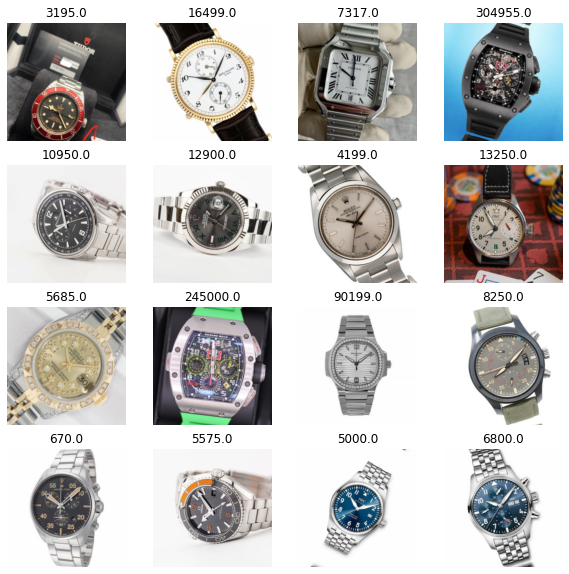

In [9]:
dls = dblock.dataloaders(watches_path, bs=bs)
dls.show_batch(max_n=16, figsize=(10,10))

In [10]:
learner = vision_learner(dls, resnet50, metrics=error_rate)
learner.loss_func = MSELossFlat()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [11]:
learner.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,17212248064.000000,14832393216.000000,1.000000,01:19
1,17952438272.000000,14829417472.000000,1.000000,01:20
2,22808178688.000000,14824491008.000000,1.000000,01:19
3,19304433664.000000,14818016256.000000,1.000000,01:20
4,23396206592.000000,14787562496.000000,1.000000,01:19
5,17837060096.000000,14783997952.000000,1.000000,01:19
6,20942960640.000000,14764756992.000000,1.000000,01:19
7,22003097600.000000,14758508544.000000,1.000000,01:20
8,25485436928.000000,14736173056.000000,1.000000,01:20
9,22012428288.000000,14712100864.000000,1.000000,01:19


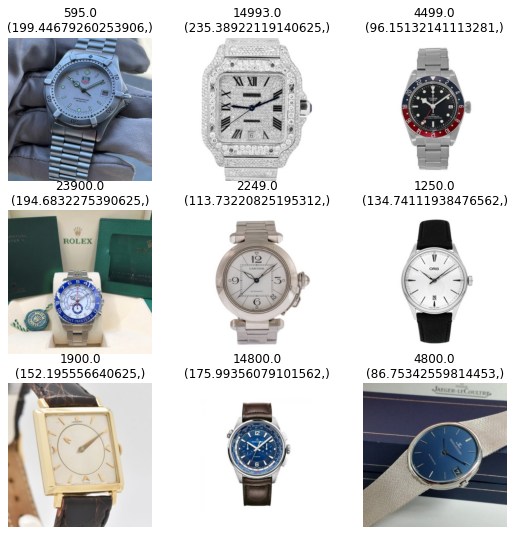

In [12]:
learner.show_results()

In [13]:
learner.fit_one_cycle(10, lr_max=slice(1e-4,1e-2) )

epoch,train_loss,valid_loss,error_rate,time
0,17354901504.000000,14614712320.000000,1.000000,01:20
1,18972694528.000000,14336784384.000000,1.000000,01:19
2,26197534720.000000,13820527616.000000,1.000000,01:20
3,15284143104.000000,13171180544.000000,1.000000,01:19
4,20580382720.000000,12523499520.000000,1.000000,01:20
5,12719867904.000000,11443815424.000000,1.000000,01:19
6,17457485824.000000,12338504704.000000,1.000000,01:20
7,13687941120.000000,10972068864.000000,1.000000,01:20
8,14081561600.000000,11447288832.000000,1.000000,01:19
9,13976210432.000000,11354372096.000000,1.000000,01:20


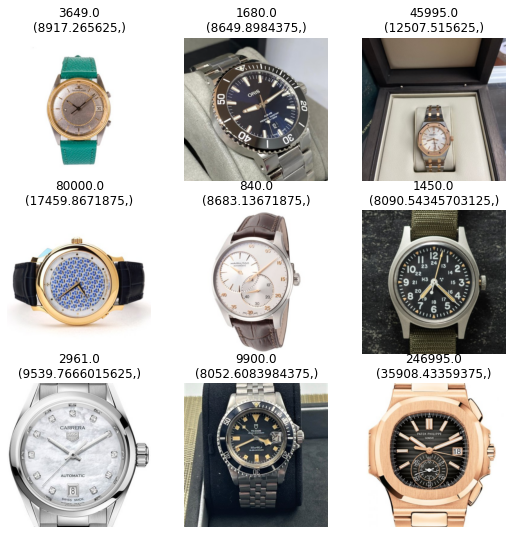

In [14]:
learner.show_results()

In [15]:
learner.save('regressionv1')

Path('models/regressionv1.pth')

In [16]:
learner.fit_one_cycle(10, lr_max=slice(1e-4,1e-2) )

epoch,train_loss,valid_loss,error_rate,time
0,14928398336.000000,11443995648.000000,1.000000,01:20
1,22164383744.000000,11751922688.000000,1.000000,01:20
2,13699545088.000000,10674806784.000000,1.000000,01:19
3,15297519616.000000,9127845888.000000,1.000000,01:20
4,13754383360.000000,8250977280.000000,1.000000,01:19
5,10235907072.000000,7479697408.000000,1.000000,01:20
6,16147034112.000000,7523599872.000000,1.000000,01:20
7,16963622912.000000,8101286400.000000,1.000000,01:19
8,8986475520.000000,7441557504.000000,1.000000,01:20
9,10127233024.000000,6929564672.000000,1.000000,01:19


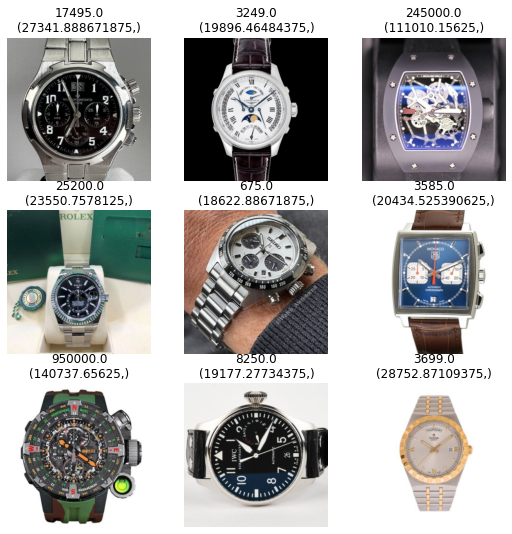

In [17]:
learner.show_results()

In [18]:
learner.save('regressionv2')

Path('models/regressionv2.pth')

In [25]:
learner.export('watch-watcher-regression.pkl')

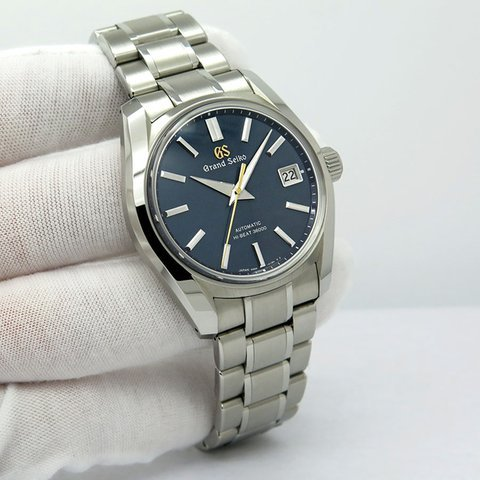

In [20]:
dls.valid_ds[120][0]

In [22]:
test = learner.predict(dls.valid_ds[120][0])

In [24]:
test[0][0]

17630.767578125